In [251]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cProfile

In [252]:
def lagrange_descent(object_func, learning_rate, iterations, t_max):
    """ 
    Defines the gradient-based optimizer. This algorithm generates an initial point on the objective function surface and then calculates a 
    line in the direction of the negative gradient of the point. It then generates a new line from the minimum point on the previous line and repeats the
    process until reaching the maximum iterations, thus finding the minimum of the surface. 

        Parameters:
            object_func: the objective function to be minimized.
            learning_rate: the magnitude of the line generated from each point.
            iterations: the number of lines to generate.
            t_max: the number of points generated on each line. Tunes the 'fine-ness' of the model.
        
        Returns:
            The coordinates of the minimum point of each line generated.
            The plot of the objective function and the min line points.
    """

    search_radius = learning_rate # length of the line from initial point

    # initialize plot
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=60, azim=300)

    # initialize lists to store min_vals, starting point included. These should be initialized to empty lists under normal operation
    x_points = [-8]
    y_points = [5]
    z_points = [x_points[0]**2 + y_points[0]**2]

    # plot the 3D surface for L - just for visualization purposes
    x_surface = np.linspace(-10, 10, 100)  
    y_surface = np.linspace(-10, 10, 100)
    x_surface, y_surface = np.meshgrid(x_surface, y_surface)
    z_surface = 3*x_surface**2 + 0.7*y_surface**2  # objective function
    ax.plot_surface(x_surface, y_surface, z_surface, alpha=0.7, rstride=10, cstride=10, linewidth=0.5)

    for i in range(iterations):

        if i == 0:
            # x0, y0 = np.random.uniform(-15, 15, 2) # generate random initial point
            x0, y0 = -8, 5 # generate initial point far from global min for illustration purposes
            if x0 > 0:
                theta = np.pi + np.arctan((1.4*y0)/(6*x0)) if x0 != 0 else np.random.uniform(0, 2*np.pi)

            else:
                theta = np.arctan((1.4*y0)/(6*x0)) if x0 != 0 else np.random.uniform(0, 2*np.pi)

            x1 = x0 + search_radius*np.cos(theta)
            y1 = y0 + search_radius*np.sin(theta)
        else: 
            x0, y0 = min_vals[0,0], min_vals[0,1]
            if x0 >= 0:
                theta = np.pi + np.arctan((1.4*y0)/(6*x0)) if x0 != 0 else np.random.uniform(0, 2*np.pi)

            else:
                theta = np.arctan((1.4*y0)/(6*x0)) if x0 != 0 else np.random.uniform(0, 2*np.pi)

            x1 = x0 + search_radius*np.cos(theta)
            y1 = y0 + search_radius*np.sin(theta)

        # calculate the coefficients of the straight line path y = mx + c
        m = (y1 - y0) / (x1 - x0)
        c = y0 - m * x0

        # generate points along the path
        t_values = np.linspace(x0, x1, t_max) # parametrization of line

        # first line: create array of points along line path
        line_vals = np.empty([t_max, 3])     # initialize empty array
        line_vals[:,0] = t_values            # populate array x-values
        line_vals[:,1] = m*t_values + c      # populate array y-values

        for j in range(t_max):

            line_vals[j, 2] = (line_vals[j,0])**2 + (line_vals[j,1])**2 # populate array z-values

        # return the coordinates to the point on the line with minimal z value
        min_vals = line_vals[line_vals[:,2] == np.min(line_vals[:,2])]

        # re-initialize points of the starting line
        x0, y0 = min_vals[0,0], min_vals[0,1]

        # display results of each iteration
        print(f"Iteration {i}: min_vals = {min_vals[0]}, theta = {theta}")

        # collect points for plotting
        if i > 0:  
            x_points.append(min_vals[0, 0])
            y_points.append(min_vals[0, 1])
            z_points.append(min_vals[0, 2])


    # plot the points
    ax.plot(x_points, y_points, z_points, marker='.', color='r', label='Min path')   

    # set labels/legend for plot
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    plt.title('Minimum Values per Iteration')
    ax.legend()
    plt.show()

In [253]:
# define parameter
t = sp.symbols('t')

# define functions
x = sp.Function('x')(t)
y = sp.Function('y')(t)
z = sp.Function('z')(t)

# define objective function
L = 3*x**2 + 0.7*y**2

Iteration 0: min_vals = [ 0.54326523  3.75410715 14.38845763], theta = -0.14481249823893905
Iteration 1: min_vals = [-1.29273797  0.7937441   2.30120116], theta = 4.157252206717144
Iteration 2: min_vals = [0.08954447 0.59570836 0.36288666], theta = -0.1422988923051222
Iteration 3: min_vals = [-0.21132375  0.12867485  0.06121494], theta = 4.140093982630344
Iteration 4: min_vals = [0.01166215 0.0969938  0.0095438 ], theta = -0.14113191248070253
Iteration 5: min_vals = [-0.02960443  0.01691076  0.0011624 ], theta = 4.236578415787645
Iteration 6: min_vals = [0.00016236 0.01294328 0.00016755], theta = -0.13250464601196246
Iteration 7: min_vals = [-6.43666109e-04 -2.05008555e-03  4.61715681e-06], theta = 4.658682073566769
Iteration 8: min_vals = [-6.43666109e-04 -2.05008555e-03  4.61715681e-06], theta = 0.6391155114820681
Iteration 9: min_vals = [-6.43666109e-04 -2.05008555e-03  4.61715681e-06], theta = 0.6391155114820681
Iteration 10: min_vals = [-6.43666109e-04 -2.05008555e-03  4.61715681e

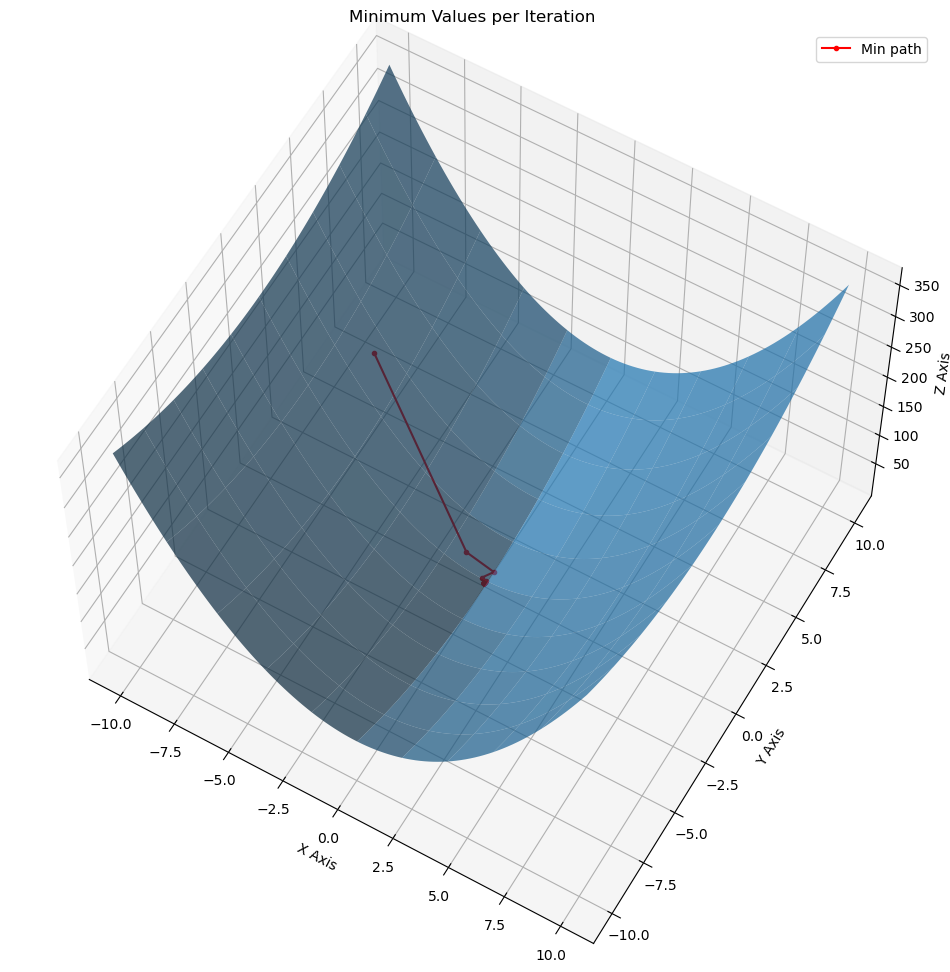

In [254]:
%matplotlib inline
# call optimizer on objective function
lagrange_descent(L, 15, 25, 1000)

In [255]:
## additional plots for concept visualization purposes
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# x = np.linspace(-3,6, 100)
# y = np.linspace(-3,6, 100)
# # z = 6*x + 1.4*y
# # theta = np.arctan((1.4*u)/(6*v))
# u, v = np.meshgrid(x,y)
# z = u**4 -5*u**3
# # plt.quiver(x,y,u,v)
# ax.plot_surface(u, v, z)

In [256]:
## evaluate algorithm speed
# cProfile.run('lagrange_descent(L, 8, 25, 1000)')

In [257]:
## next goal will be to get the algorithm to work on this semi-convex function for the following angles
## need to come up with effective way to calculate angle of gradient here

# z_surface = x_surface**4 - 5*x_surface**3
# theta = np.pi + np.arctan((y0)/(3*x0**3 - 15*x0**2)) if x0 != 0 else np.random.uniform(0, 2*np.pi)
# theta = np.arctan((y0)/(3*x0**3 - 15*x0**2)) if x0 != 0 else np.random.uniform(0, 2*np.pi)
# line_vals[j, 2] = (line_vals[j,0])**4 - 5*(line_vals[j,1])**3 # populate array z-values - L appears here
